# <font color='blue'>**LABORATORIO 1. Visión computacional Tradicional y CNN´s aplicadas a problemas de clasificación de imágenes**

<font color='red'>Integrantes (Máximo 3 personas):

<font color='red'>Nombres y Apellidos: 
* Juan Sebastian Arce - Código: 2227660
* Juan David Gonzalez - Código: 2230826
* Juan Sebastian Montoya - Código: 2231993

<font color='red'>Codigo

Partiendo de la idea general que asegura que una arquitectura de red neuronal que trabaja bien para un problema de visión computacional trabajará bien para cualquier otro problema en la misma area, en este laboratorio, usted podrá basarse en alguna de estas arquitecturas (i.e, LeNet, VGG, AlexNet), para crear una CNN que le permita clasificar los digitos obtenidos del lenguajes de señas.

Usted deberá seguir las instrucciones (<font color='red'>resaltadas en rojo </font>), las cuales además de guiarlo, generarán en suma el puntaje final obtenido para este laboratorio.

Cabe resaltar que a través de este documento se estará promoviendo el uso de algunas funciones propias de Keras, ya que esta es una excelente API que permite reducir considerablemente los tiempos de experimentación.



In [1]:
#Para dar un orden al trabajo realizado, coloque aqui todas las librerias que van a ser usadas. 
import cv2
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
from keras.regularizers import l2
import tensorflow_datasets as tfds

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==4.4.0.44 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-contrib-python==4.4.0.44


In [3]:
# Vamos a usar el Sign Language Digits Dataset
#By Turkey Ankara Ayrancı Anadolu High School Students.

!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git


Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089
Receiving objects: 100% (2095/2095), 15.07 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (660/660), done.


In [4]:
#Esta parte esta hecha para ustedes. 
#Se les pide que intenten seguir el código y entender
#lo que se hace y el porque se hace. Que tan importante es usar pathlib en este caso?
"Trabajar con pathlib en este caso ayuda a evitar errores comunes en las rutas, como las barras inversas ó guiones bajos (_) "

sld_dir = pathlib.Path('Sign-Language-Digits-Dataset/Dataset/')
print(len(list(sld_dir.glob('*/*.JPG'))))

2062


<font color='red'>Punto 1 (0.25). Lea la ayuda de la utilidad llamada **preprocessing.image_dataset_from_directory** de keras y utilicela para crear su dataset </font>. 

Lea atentamente que parametros usted puede ingresarle a la función y tambien que es lo que la misma retorna.

Use el 80% de las imagenes para entrenamiento y el 20% para validación. 

Cree los dos conjuntos: entrenamiento y validación.



In [5]:
batch_size = 32
img_height = 256
img_width = 256

In [6]:
#Pegue aquí el código para crear  el dataset de entrenamiento
train_data = tf.keras.utils.image_dataset_from_directory(
    sld_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2062 files belonging to 10 classes.
Using 1650 files for training.


In [7]:
#Pegue aquí el código para crear  el dataset de validación
validation_data = tf.keras.utils.image_dataset_from_directory(
    sld_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 2062 files belonging to 10 classes.
Using 412 files for validation.


<font color='red'>Punto 2 (0.25). Observando en que consiste el conjunto de datos </font>. 

Los dos conjuntos de datos creados en el punto 1, tienen una estructura especifíca para el manejo de las imagenes y las etiquetas.

Tome como base el código que se hizo en clase para mostrar las primeras 5 imagenes del dataset de MNIST y modifiquelo, para mostrar 9 imágenes del dataset de entrenamiento (cada una de las imagenes debe presentar su etiqueta en la parte superior).

A continuación algunos Tips:


*   Suponiendo que su conjunto de entrenamiento se llame: ***sld_train***. Una forma de saber los nombres de las clases es: **nombres_clases = sld_train.class_names**

*   Si usted hace un ciclo for usando como rango por ejemplo el ***sld_train*** este devuelve dos arreglos: imagenes y etiquetas

*   Tenga en cuenta que para poder visualizar este tipo de imágenes  usted debe convertirlas, por ejemplo: **imagen[i].numpy().astype('uint8')**





Nombres de las clases:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']




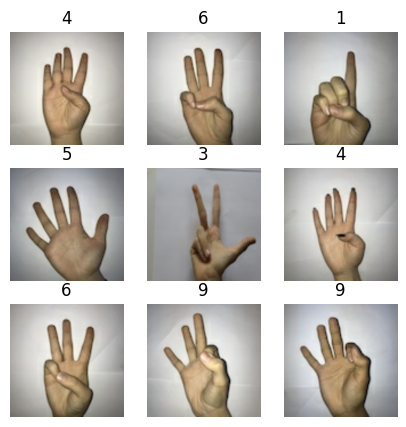

In [8]:
#Pegue aquí su código para visualizar imágenes
from tqdm.auto import tqdm
nombres_clases = train_data.class_names
print("Nombres de las clases:")
print(nombres_clases)
print('\n')
plt.figure(figsize=(5, 5))
for imagenes, etiquetas in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(imagenes[i].numpy().astype("uint8"))
    plt.title(nombres_clases[etiquetas[i]])
    plt.axis("off")

In [9]:
# "imagenes" es de 32 imagenes de forma "256x256x3"
# "etiquetas" es de 32 que son las etiquetas correspondientes a las 32 imagenes
imagenes_train_data = []
for imagenes, etiquetas in train_data:
  imagenes_train_data.append
  print(imagenes.shape)
  print(etiquetas.shape)
  break

(32, 256, 256, 3)
(32,)


<font color='red'>Punto 3 (0.25). Lea la ayuda de la utilidad llamada **experimental.preprocessing.Rescaling** de keras y utilicela para normalizar sus conjuntos de datos</font>. 

Lea atentamente que parametros usted puede ingresarle a la función y tambien que es lo que la misma retorna.

Aunque no es algo imprescindible, si usted desea puede iterar sobre el conjunto de datos normalizados e irlos guardando en las variables x_train, y_train, x_test y y_test usadas en clase. Para lo que podría necesitar una línea de código parecida a esto: **x_train, y_train = next(iter(dato_normalizado))**

In [10]:
#Pegue aquí su código para normalizar los datos de entrenamiento
# Se estandarizan los datos para que esten en el rango de [0,1] mediante una capa de cambio de escala
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_data = train_data.map(lambda x, y: (normalization_layer(x), y))
imagenes, etiquetas = next(iter(normalized_data))
primera_imagen = imagenes[0]
print(np.min(primera_imagen), np.max(primera_imagen))

0.0029641546 0.99904984


<font color='red'>Punto 4 (1.5). Cree un clasificador tradicional para el dataset dado. 

Utilice los conocimientos adquiridos en clase acerca de visión computacional tradicional: detectores/descriptores, BoVW y ANN´s para que cree, entrene y valide un CLASIFICADOR TRADICIONAL.
Recuerde obtener métricas que pueda compara con el clasificador CNN.


In [11]:
#Pegue aquí su código del entrenamiento, validar y medir su clasificador tradicional
dir="/content/Sign-Language-Digits-Dataset/Dataset"

images = []
val=[]
folders_dir = []

#Añadimos las imágenes de diferentes carpetas en un array
def load_images_from_folder_d(folder):
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
    val.append(folder[-1])
  return images,val

for i in range(10):
  folders_dir.append(dir+"/"+str(i))

for folder in folders_dir:
  imgs, label = load_images_from_folder_d(folder)
 

In [12]:
len(imgs)

2062

In [13]:
width = 64
height = 64
dim = (width, height)
new=[]
for img in imgs:
 resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
 new.append(resized)

In [14]:
grayscale=[]
for img in new:
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 grayscale.append(gray)
grayscalenew=np.asarray(grayscale)

In [15]:
flatten=[]
for im in grayscale:
 data = np.array(im)
 flattened = data.flatten()
 flatten.append(flattened)

In [16]:
label=np.asanyarray(label)

In [17]:

x_train, x_test, y_train, y_test = train_test_split(flatten,label, test_size=0.25, random_state=58)

In [18]:
#Decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred_dt=clf.predict(x_test)
y_train_score_dt=clf.predict(x_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_test, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.5271317829457365
Train 1.0


<font color='red'>Punto 5 (0.25). Creando su arquitectura básica de CNN</font>. 

Cree una arquitectura basado en alguno de los modelos propuestos. Para esta parte su modelo debe estar completo (todas las capas convolucionales, pooling y fully conected), pero no deben tener ningún tipo de regularización.

De una explicación corta acerca (No más de 10 líneas) de la arquitectura usada y el porqué de su selección.

Muestre al final el resumen de su modelo y escoja el método de optimización que va a ser usado (este puede ser modificado en el transcurso de los entrenamientos, si usted lo considera necesario)

* ''' El modelo consta de tres bloques de convolución con una capa de max pool en cada uno de ellos, hay una capa conectada con 128 unidades encima que se activa mediante la función relu (esta utilizada para que mediante el sesgo y datos de entada no pueda dar valores negativos)

* Para los métodos de optimización hemos decidido escoger Data-Augmentation y L2
  * Data augmentation lo hemos escogido ya que proporciona una variación de los datos que ya teniamos previamente, 
lo que ayuda al modelo a generar nuevos datos, lo que ayuda tambien a reducir el overfitting gracias al aumento de datos 
  * El regularizador L2 lo utilizamos puesto que ayuda a evitar el overfitting al limitar la complejidad del modelo
y mantener pequeños los pesos. El regulador se basa en que los pesos muy grandes se penalizan mucho, mientras que 
los pesos pequeños se penalizan menos. '''

In [19]:
#Realice aqui su modelo de CNN
num_classes = 10
modelo = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
optimo= "adam"
modelo.compile(optimizer=optimo, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'] )
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

<font color='red'>Punto *6* (0.5). Entrenando y validando su modelo CNN</font>. 

Entrene su modelo básico, obtenga los gráficos de accuracy y loss y saque sus propias conclusiones.



In [21]:
#Muestre todo el proceso aquí
epochs=10
history = modelo.fit(train_data, validation_data=validation_data, epochs=epochs)

Epoch 1/10
52/52 [==============================] - 20s 84ms/step - loss: 2.5151 - accuracy: 0.1812 - val_loss: 2.1015 - val_accuracy: 0.3398
Epoch 2/10
52/52 [==============================] - 3s 51ms/step - loss: 1.3603 - accuracy: 0.5497 - val_loss: 1.1311 - val_accuracy: 0.6189
Epoch 3/10
52/52 [==============================] - 3s 50ms/step - loss: 0.7090 - accuracy: 0.7782 - val_loss: 0.7919 - val_accuracy: 0.7354
Epoch 4/10
52/52 [==============================] - 4s 66ms/step - loss: 0.4828 - accuracy: 0.8430 - val_loss: 0.6877 - val_accuracy: 0.7767
Epoch 5/10
52/52 [==============================] - 3s 52ms/step - loss: 0.3607 - accuracy: 0.8830 - val_loss: 0.7847 - val_accuracy: 0.7937
Epoch 6/10
52/52 [==============================] - 3s 48ms/step - loss: 0.2583 - accuracy: 0.9085 - val_loss: 0.7562 - val_accuracy: 0.7840
Epoch 7/10
52/52 [==============================] - 3s 51ms/step - loss: 0.1666 - accuracy: 0.9448 - val_loss: 0.7344 - val_accuracy: 0.7961
Epoch 8/10
5

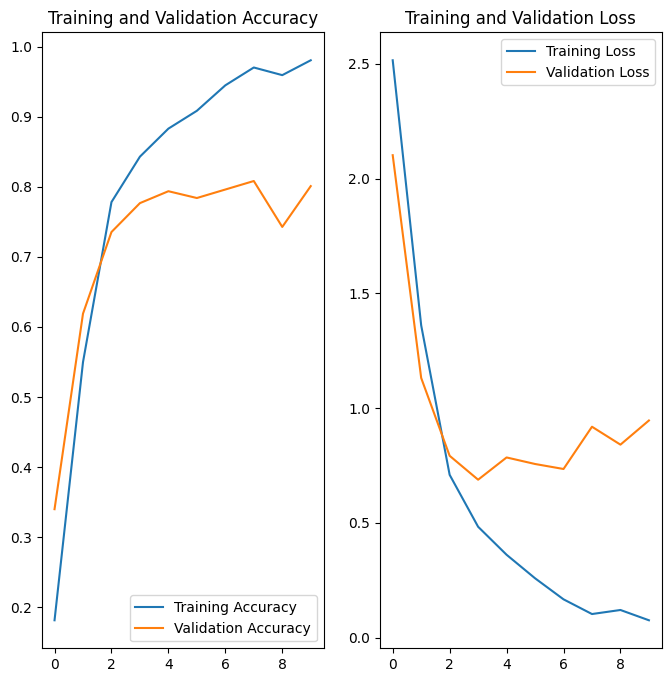

Loss:[2.5150787830352783, 1.3602741956710815, 0.7089646458625793, 0.48275354504585266, 0.36073175072669983, 0.2582758367061615, 0.166567862033844, 0.10248821973800659, 0.12010994553565979, 0.07528329640626907] - Accuracy:[0.18121212720870972, 0.5496969819068909, 0.778181791305542, 0.8430302739143372, 0.8830302953720093, 0.9084848761558533, 0.9448484778404236, 0.9703030586242676, 0.9593939185142517, 0.9806060791015625]


In [22]:
#Muestre las gráficas y métricas aquí
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Loss:{0} - Accuracy:{1}".format(loss, acc))

<font color='red'>Punto **7** (1.0). Mejorando su CNN</font>. 

Haga uso de los metodos de regularización que usted considere convenientes (puede ser más de uno), de tal forma que consiga reducir considerablemente el overfitting.

Usted puede entrenar la red las veces que usted desee cambiando los metodos de regularización, pero asegurese de dejar plasmados en este trabajo dos modelos diferentes (por lógica deben ser los dos mejores)

Realice una tabla comparativa mostrando las diferencias entre su modelo CNN base, los dos modelos con regularización y el modelo tradicional.

# REGULARIZACIÓN 1 - DATA AUGMENTATION

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

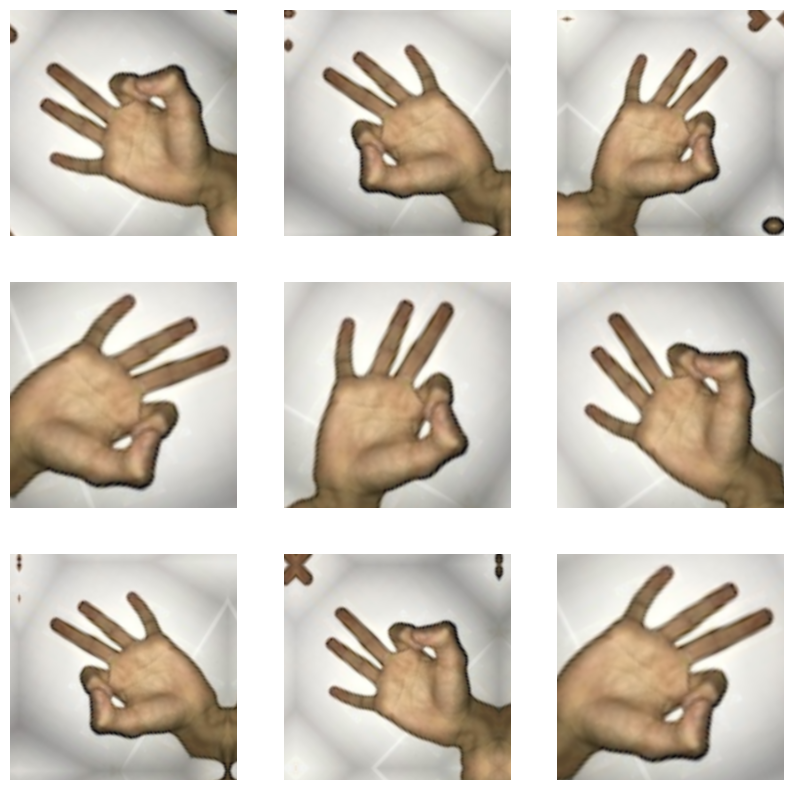

In [24]:
plt.figure(figsize=(10, 10))
for imagenes, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(imagenes)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [25]:
modelo = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
modelo.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
modelo.summary()

epochs = 15
history = modelo.fit(train_data,validation_data=validation_data,epochs=epochs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

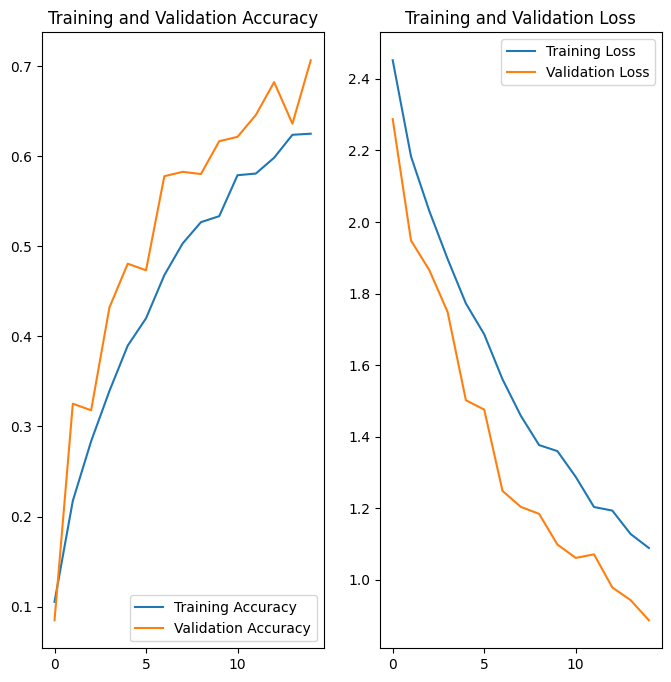

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# REGULARIZACIÓN 2 - L2

In [28]:
entrada = LK.Input(shape=(32,32,3))
conv1 = LK.Conv2D(6,(5,5),padding='valid', activation='relu',kernel_regularizer=l2(0.01))(entrada) 
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,(5,5),padding='valid', activation='relu',kernel_regularizer=l2(0.01))(pool1) 
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu',kernel_regularizer=l2(0.01))(flat)
fc2 = LK.Dense(84,activation='relu',kernel_regularizer=l2(0.01))(fc1)
salida = LK.Dense(10,activation='softmax')(fc2)
modelo_kr = MK.Model(entrada,salida)

modelo_kr.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0     

In [29]:
modelo_kr.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
modelo.summary()

epochs = 15
history_kr = modelo.fit(train_data,validation_data=validation_data,epochs=epochs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

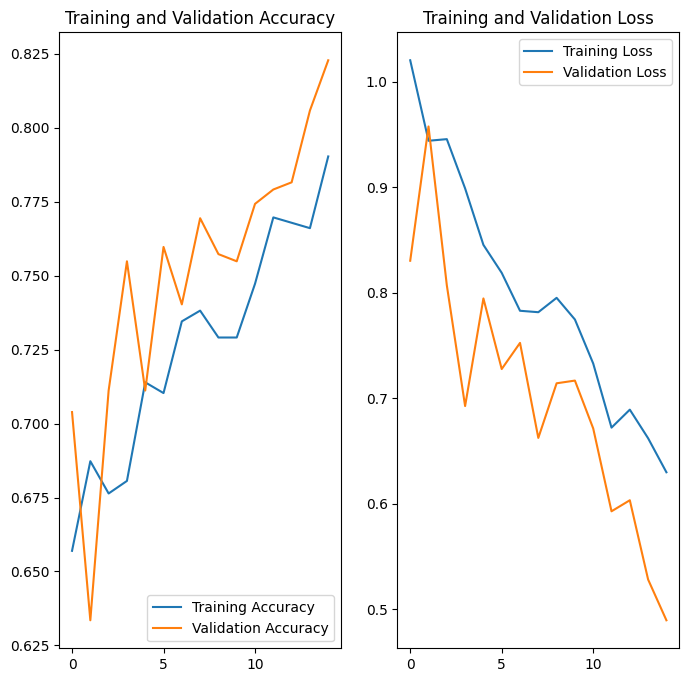

In [30]:
acc = history_kr.history['accuracy']
val_acc = history_kr.history['val_accuracy']

loss = history_kr.history['loss']
val_loss = history_kr.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Conclusiones
* A partir de las gráficas podemos observar que el mejor ajuste se da cuando utilizamos el "Data-augmentation" al tener mas variaciones para evitar el overfitting en los datos de entrenamiento. Por lo tanto este ha sido el modelo con el regularizador que vamos a implementar para cargar nuevos datos y que nos pueda clasificar imagenes tomadas por el colectivo. 
* Se puede observar que el accuracy del modelo regularizado con L2 es un poco mejor. Sin embargo podemos observar que en la gráfica tiene picos, por lo que es posible que clasifique de manera correcta unos datos pero otros estarán muchos mas alejados, por lo que la gráfica generada con el data-augmentation es más próxima a tener buenos resultados

<font color='red'>Punto 8 (1.0). Pruebas adicionales de su mejor Clasificador</font>. 

Realice un conjunto de 20 imagenes, mostrando diferentes digitos del lenguaje de señas. Realice un programa que permita leer las imagenes, pre-procesarlas y dejarlas listas para servir de entrada a su mejor clasificador.  Muestre las imagenes procesadas y el valor de predicción de su red con porcentaje. 

In [31]:
!git clone https://github.com/JuanSMontoyaF/VisionComputacional.git

Cloning into 'VisionComputacional'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 1.06 MiB | 10.27 MiB/s, done.


In [32]:
!unzip /content/VisionComputacional/FotosVisionComputacional-20230309T001519Z-001.zip

Archive:  /content/VisionComputacional/FotosVisionComputacional-20230309T001519Z-001.zip
  inflating: FotosVisionComputacional/nueve.jpeg  
  inflating: FotosVisionComputacional/seis (2).jpeg  
  inflating: FotosVisionComputacional/uno (2).jpeg  
  inflating: FotosVisionComputacional/uno.jpeg  
  inflating: FotosVisionComputacional/nueve (2).jpeg  
  inflating: FotosVisionComputacional/tres.jpeg  
  inflating: FotosVisionComputacional/ocho (2).jpeg  
  inflating: FotosVisionComputacional/dos (2).jpeg  
  inflating: FotosVisionComputacional/cuatro (2).jpeg  
  inflating: FotosVisionComputacional/seis.jpeg  
  inflating: FotosVisionComputacional/tres (2).jpeg  
  inflating: FotosVisionComputacional/ocho.jpeg  
  inflating: FotosVisionComputacional/siete (2).jpeg  
  inflating: FotosVisionComputacional/cinco (2).jpeg  
  inflating: FotosVisionComputacional/siete.jpeg  
  inflating: FotosVisionComputacional/dos.jpeg  
  inflating: FotosVisionComputacional/cero (2).jpeg  
  inflating: Fotos

In [33]:
dir_path = '/content/FotosVisionComputacional'
images_list = os.listdir(dir_path)

for image_name in images_list:
    # ruta completa de la imagen
    image_path = os.path.join(dir_path, image_name)
    
    # carga la imagen en memoria utilizando load_img y convierte a un array de Numpy
    img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    # realiza la predicción utilizando el modelo entrenado
    predictions = modelo.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    # hacer algo con los resultados de la predicción, como imprimir la clase con mayor probabilidad
    print(f"La imagen {image_name} es de la clase {nombres_clases[np.argmax(score)]} con una probabilidad del {100 * np.max(score):.2f}%")

1/1 [==============================] - 0s 215ms/step
La imagen dos (2).jpeg es de la clase 1 con una probabilidad del 85.43%
1/1 [==============================] - 0s 20ms/step
La imagen uno.jpeg es de la clase 1 con una probabilidad del 83.47%
1/1 [==============================] - 0s 18ms/step
La imagen ocho.jpeg es de la clase 8 con una probabilidad del 42.76%
1/1 [==============================] - 0s 21ms/step
La imagen cuatro.jpeg es de la clase 9 con una probabilidad del 59.34%
1/1 [==============================] - 0s 22ms/step
La imagen seis.jpeg es de la clase 9 con una probabilidad del 74.01%
1/1 [==============================] - 0s 19ms/step
La imagen nueve (2).jpeg es de la clase 1 con una probabilidad del 93.86%
1/1 [==============================] - 0s 24ms/step
La imagen cero.jpeg es de la clase 0 con una probabilidad del 100.00%
1/1 [==============================] - 0s 19ms/step
La imagen cero (2).jpeg es de la clase 1 con una probabilidad del 90.33%
1/1 [============